# 1. K-Means Clustering Intuition 
We know that we are going to be trying to perform **K-Means Clustering** on data. So let's take a moment to visualize some data that we may get. 

<img src="images/k-means-data.png" width="500" height="500">

We can see that the points are all the same color. This is because we are doing unsupervised learning, and there are no classes being given to these points. Each point is just a vector, and that is all we know about each point. However, our human pattern recognition abilities allow us to see 3 distinct groups. In other words, we don't need the data set to tell us that these three groups are distinct. Our own pattern recognition abilities allow us to see this very clearly. 

## 1.1 The Problem
What you may have noticed after looking at the data above, however, is that it is a very unique and specific situation. The first limitation of this data was that it was 2-dimensional. This is of course necessary, because if you had a 100 dimensional data set you wouldn't be able to see it. The universe itself only has 3 dimensions of space, so that is all you can see. This is problematic because most real world data sets are not 2 dimensional, and hence you cannot see most real world data. This means that your own pattern recognition skills are not useful in this scenario. It would be nice if we had some algorithm to find clusters or groups of data, that could work no matter what the dimensionality of the data is. 

Here is another issue. In the original data, it was generated so that it would show 3 distinct clusters very clearly. Real data isn't so nice. We will want to be able to know:

> `Is the cluster we found good or not?`

## 1.2 Intuition 
So, as a first step into understanding k-means clustering, let's consider 2 fundamental truths about the clusters in a data set. 

<img src="images/clusters-fact.png">

**Fundamental Truth 1**<br>
Suppose we know that the yellow, purple, and green points are the center of some clusters, and we would like to know which center this new blue point belongs to. This point of course belongs to the cluster center that it is closest to. So, the decision rule for choosing which cluster a new point belongs to, is to pick the nearest cluster center. 

<br>
**Fundamental Truth 2**<br>
Now, lets consider the second fundamental fact about clusters. Let's say that all of the points we see below belong to the same cluster. We can refer to the data points as:

#### $$x_1,...,x_C$$

<img src="images/clusters-fact-2.png" width="500" height="500">

What is the center of this cluster? Of course, that is just the mean of all these data points. This is also referred to as the centroid, if you are thinking geometrically. So, as you know, the way to find the mean of a set of vectors, is to add them up, and divide by the number of vectors:

#### $$m = \frac{1}{C}\sum_{i=1}^Cx_i$$

## 1.3 Combining into Clustering Algorithm
Believe it or not, the two above facts are all that you need to implement k-means clustering. It turns out that if we just initialize the set of clusters randomly, if we just repeat these two steps over and over, we will converge to an answer. 

<br>
**Pseudocode**<br>
```
Initialize: pick K random points to be the cluster centers
While not converged:
    Assign each point to the nearest cluster center
    Recalculate each cluster center from points that belong to it
```

---

<br>
# 2. K-Means Algorithm
The input to K-Means is a matrix $X$, which is of size $N x D$. This means that we are dealing with $N$ samples and that those samples have $D$ features. 

## 2.1 Training Algorithm
There are two main steps to the k-means clustering training algorithm. 
> 1. First we choose $k$ different cluster centers. We generally just assign these to random points in the data set.
2. Then we go into our main loop. Here the first step is to decide which cluster each point in $X$ belongs to. We do that by looking at every sample, and choosing the closest cluster center. Remember, these are usually just assigned randomly to begin with. The second step is to recalculate each cluster center based on the points that were assigned to it. We do this by taking all of the samples, and calculating the mean. This is done until the algorithm converges. Generally this happens very fast, in about 5 to 15 steps. This is very different from gradient descent in deep learning, where we may have thousands of iterations before convergence. 

---

<br>
# 3. Soft K-Means
One problem that we find when we do K-Means is that it is highly sensitive to its initialization. A possible resolution is to restart **K-Means** several times, and use whichever result gives us the best final objective. What does this tell us though? Well, it tells us that the cost function is susceptible to local minima. 

One way to overcome this it have **fuzzy membership** to each class. This means that each data point doesn't belong to one class or another. But rather, there is an "amount" of membership. For example, it may be 60% part of cluster 1, and 40% part of cluster 2. We can get soft k means which just a small adjustment to the regular k-means algorithm. 

## 3.1 Soft K-Means Algorithm

**Pseudocode**<br>
```
Initialize m1...mk = random points in X
While not converged:
    Step 1: Calculate cluster responsibilities
```

#### $$r_k^{(n)} = \frac{exp\Big[-\beta d(m_k, x^{(n)})\Big]}{\sum_j exp \Big[-\beta d(m_j, x^{(n)})\Big]}$$

```
    Step 2: Recalculate means
```
#### $$m_k = \frac{\sum_n r_k^{(n)}x^{(n)}}{\sum_n r_k^{(n)}}$$

We can see that step 1 is where the biggest change occurs. We are now defining a term $r_k^{(n)}$, that will always be a fraction. In the case of hard k-means, aka regular k-means, that is where $r_k^{(n)}$ is exactly 0 or 1. We can see that in step 2 we are calculating a weighted mean. If $r_k^{(n)}$ is higher, then this $x_n$ matters more to this cluster K. This means that it has more influence on the calculation of its mean. 

If you are familiar with deep learning, you may recognize the calculation of $r_k^{(n)}$ to be something similar to that of the softmax function. 

## 3.2 Soft K-Means Breakdown
Let's take a minute to breakdown these two steps of soft k-means in order to understand them better. If we look at the equation for the responsibility: 

#### $$r_k^{(n)} = \frac{exp\Big[-\beta d(m_k, x^{(n)})\Big]}{\sum_{j=1}^K exp \Big[-\beta d(m_j, x^{(n)})\Big]}$$

We can see that it depends on the distance between the point, and each cluster center. Why does this make sense? Well, you can imagine that if a data point is very close to one cluster center, and very far away from another, then we will get a data point close to 1. This means we will have a higher probability that the point belongs to the cluster with the center closest to it, will be the highest! 

<img src="images/responsibility.png">

However, now lets say a data point is right in between two clusters. Then we should get 0.5. This makes sense because we are equally confident that this data point could belong to either of the two clusters. 

<img src="images/responsibility-2.png">

So, this method allows us to quantify how confident we are in the cluster assignments, rather than simply assigning a data point to whichever cluster it is closest to. 

## 3.3 Relationship to Gaussian
You may notice that the numerator in the term for the responsibility looks suspiciously like a **Gaussian**.

#### $$Numerator: \; exp\Big[-\beta d(m_k, x^{(n)})\Big]$$

#### $$Gaussian \; PDF: \frac{1}{\sqrt{2 \pi \sigma^2}} exp \Big(\frac{1}{2\sigma^2}(x-\mu)^2\Big)$$

We will make this connection soon, when we discuss **Gaussian Mixture Models**. As you may know, the gaussian contains a variance term, which shows up in the exponent. The variance term controls how fat or skinny the PDF of the Gaussian is. And so this controls how fat or skinny the influence of each cluster is on each data point. 

## 3.4 Calculating the Mean
In step 2 we had to calculate the mean, but it looked a little different than normal. This equation actually has a name, the **weighted arithmetic mean**. It is a generalization of the regular arithmetic mean, where you can think of each data point as having the same weight of 1. 

#### $$Regular \; mean: m_k = \frac{1}{N}\sum_n x^{(n)} = \frac{1*x^{(1)} + 1*x^{(2)} + ...}{1 + 1 + ...}$$

#### $$Weighted \; mean: m_k = \frac{\sum_n r_k^{(n)}x^{(n)}}{\sum_n r_k^{(n)}} = \frac{r_k^{(1)}x^{(1)} + r_k^{(2)}x^{(2)} + ...}{r_k^{(1)} + r_k^{(2)} + ...}$$

This also makes sense in terms of clustering, since, for example, if a data point is far away from the cluster center, then the corresponding responsibility will be close to 0, and therefore each data point shouldn't have a big influence on calculating the cluster center. 

## 3.5 Purpose of Soft K-Means
The purpose of Soft K-Means is that it allows us to quantify our confidence in the cluster assignment. Look at the situation below:

<img src="images/responsibility-3.png">

We can see that this data point is still really in the middle of the two clusters and shouldn't really be assigned to the cluster on the right. It is still mainly in the center. However, this is exactly what hard k-means would do. It would say that this point belongs to the cluster on the right, and treat it the same way as all of the other points which are closer, and maybe more definitively belong to the cluster on the right. 

Soft K-means allows us to represent the intuitive understanding that we have of the point belonging not fully to either class, with a number. 

> "Test point belongs to yellow with 51% probability, but may still belong to purple with 49% probability"

---

<br>
# 4. The K-Means Objective Function
As was the case with supervised learning, it is very important to talk about the objective functions that we are trying to maximize. Assuming that we are using euclidean distance as our distance measure, our objective function is:

#### $$J = \sum_n \sum_k r_k^{(n)} ||m_k - x^{(n)}||^2$$

In english this means we will sum over all data points $n$, and then sum over all clusters $k$, the distance between each cluster and each data point, weighted by the responsibilities. So, really this is just the squared distance weighted by the responsiblities. 

So, if $x_n$ is far away from the mean of cluster k, hopefully that responsibility has been set very low. In deep learning we will use gradient descent, but we do not use that here! In this case we actually do what is called **coordinate descent** This means that we are moving in the direction of a smaller J, with respect to only 1 variable at a time. We can see that this is true because we only update 1 variable at a time, either $r_k^{(n)}$, or $m_k$. There is a mathematical guarantee that each iteration will result in the objective function decreasing, and thus it will always converge. However, there is no guarantee that it will converge to a global minimum. 

---

<br>
# 5. K-Means In Code


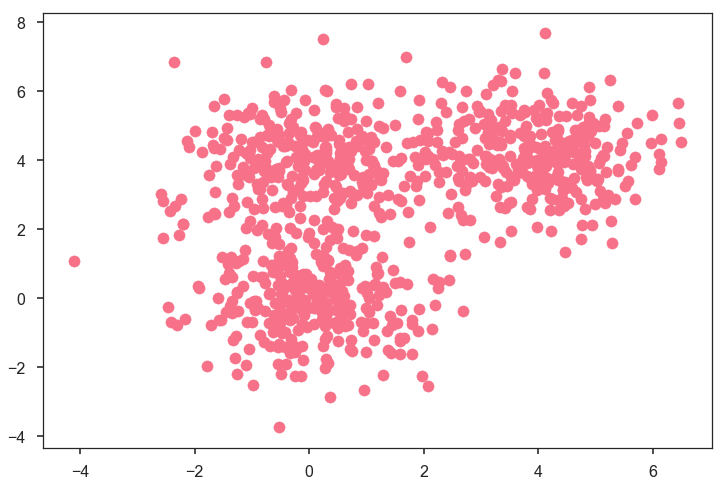

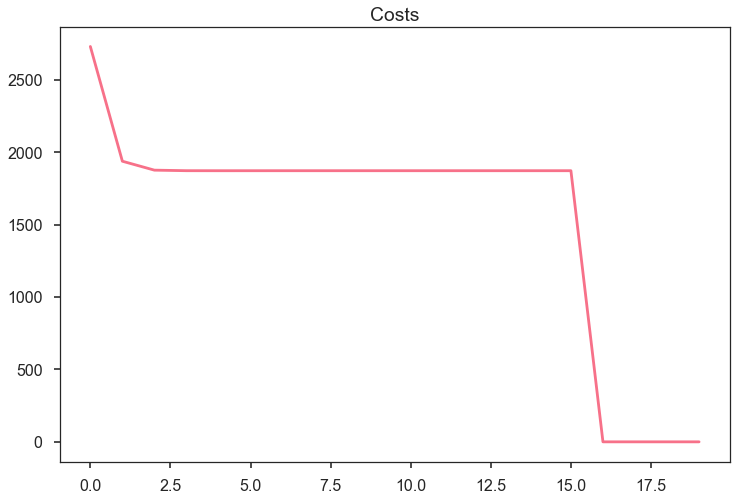

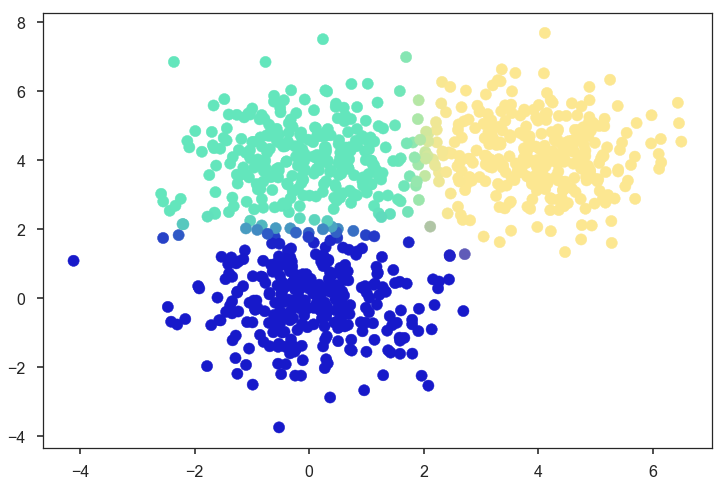

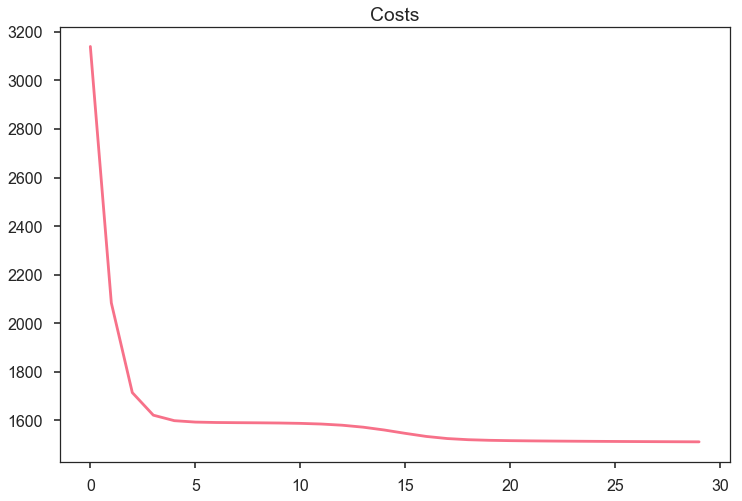

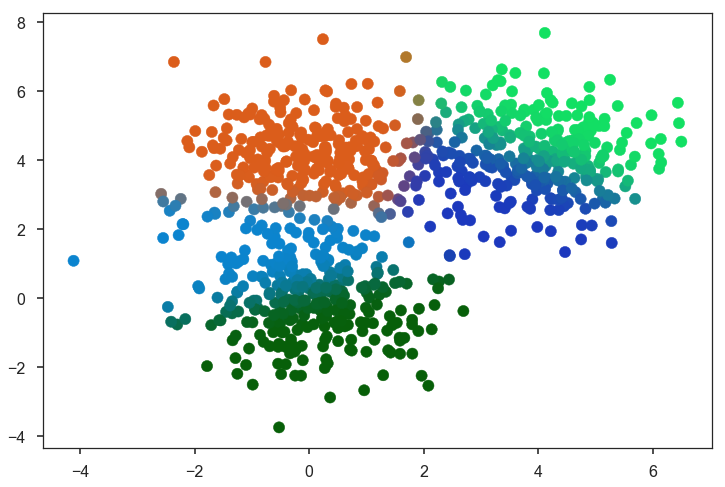

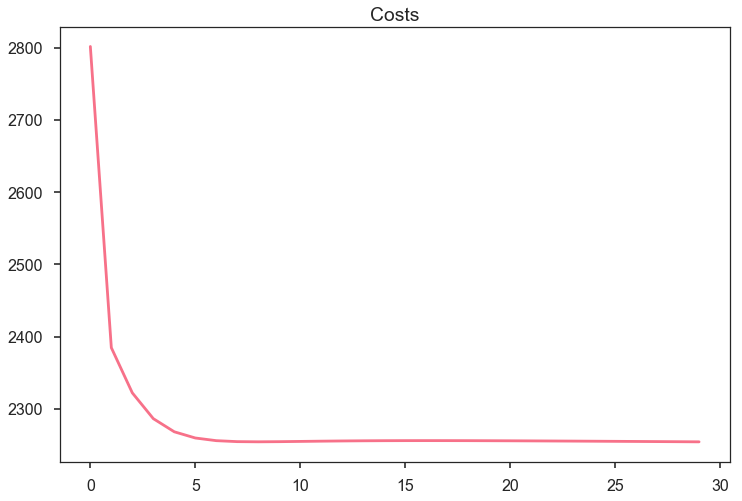

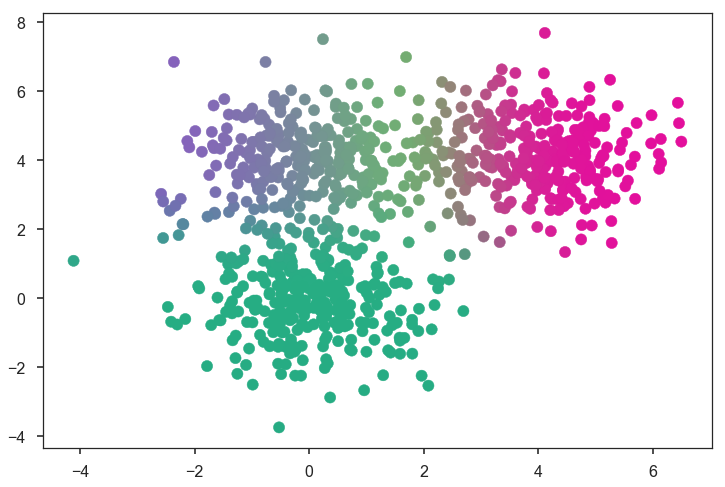

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def d(u, v):
    diff = u - v
    return diff.dot(diff)
  
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

def plot_k_means(X, K, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))

        R = exponents / exponents.sum(axis=1, keepdims=True)

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break

    if show_plots:
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        fig, ax = plt.subplots(figsize=(12,8))
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    return M, R


def get_simple_data():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X

def main():
    X = get_simple_data()

    # what does it look like without clustering?
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # luckily, we already know this
    plot_k_means(X, K)

    K = 5 # what happens if we choose a "bad" K?
    plot_k_means(X, K, max_iter=30)

    K = 5 # what happens if we change beta?
    plot_k_means(X, K, max_iter=30, beta=0.3)

if __name__ == '__main__':
    main()

---

<br>
# 6. K-Means Clustering Visualization 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k]*d(M[k], X[n])
    return cost

def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.ones((N, K)) / K

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # moved the plot inside the for loop
        colors = R.dot(random_colors)
        fig, ax = plt.subplots(figsize=(12,8))
        plt.scatter(X[:,0], X[:,1], c=colors)

        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break
    plt.show()

def main():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3

    # what does it look like without clustering?
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3 # luckily, we already know this
    plot_k_means(X, K)

if __name__ == '__main__':
    main()

---

<br>
# 7. When can K-Means Fail?

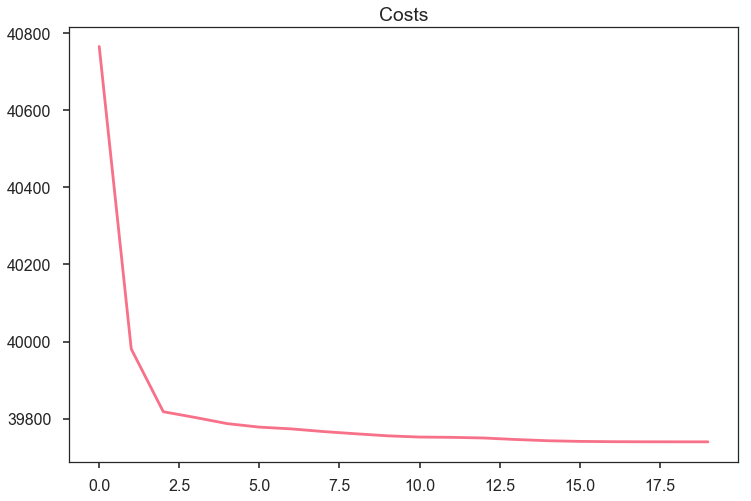

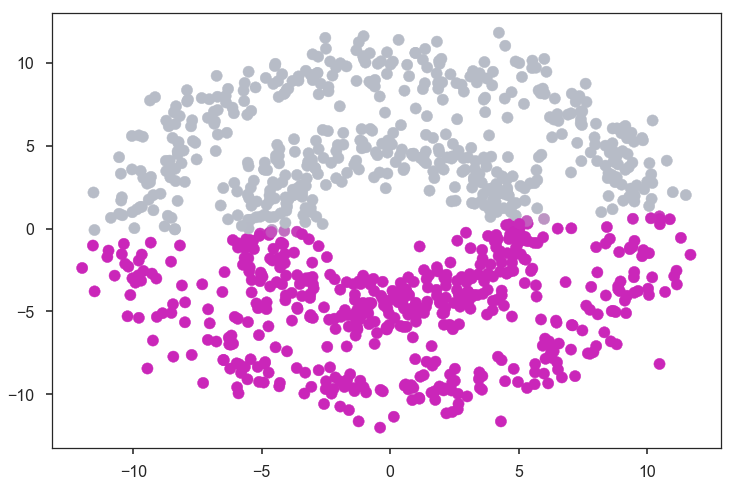

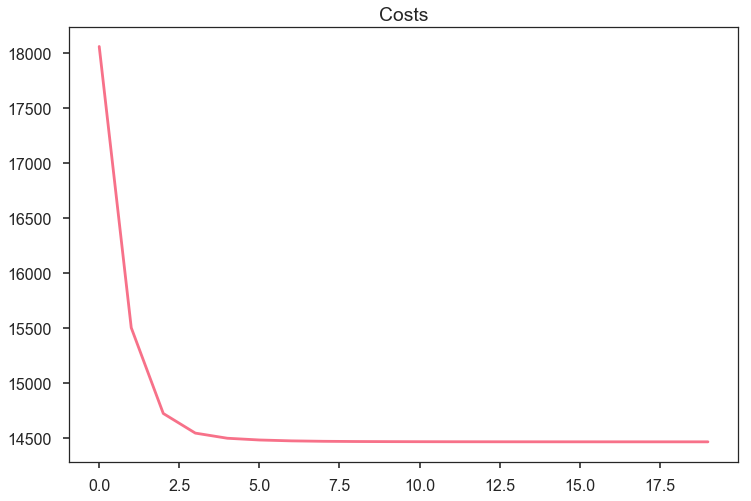

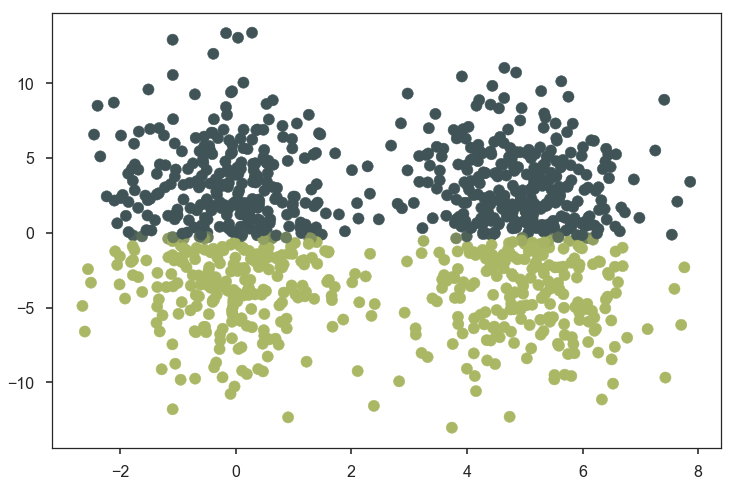

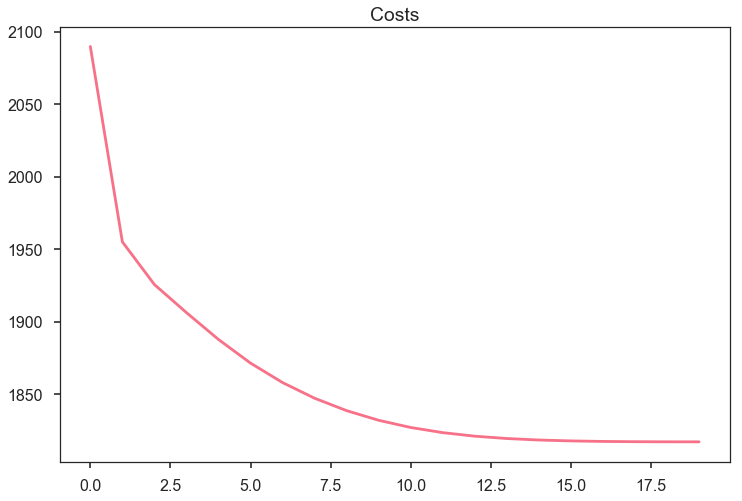

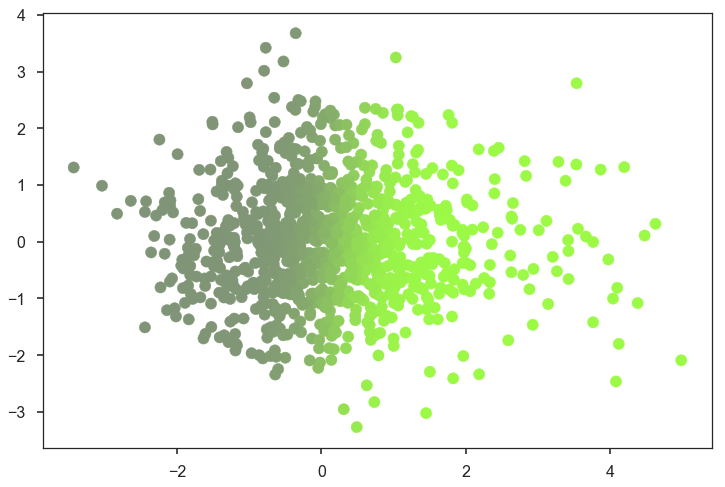

In [32]:
def plot_k_means(X, K, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))

        R = exponents / exponents.sum(axis=1, keepdims=True)

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break

    if show_plots:
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        fig, ax = plt.subplots(figsize=(12,8))
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    return M, R

def donut():
    N = 1000
    D = 2

    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    return X

def main():
    # donut
    X = donut()
    plot_k_means(X, 2)

    # elongated clusters
    X = np.zeros((1000, 2))
    X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
    X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
    plot_k_means(X, 2)

    # different density
    X = np.zeros((1000, 2))
    X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
    X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
    plot_k_means(X, 2)

if __name__ == '__main__':
    main()

---

<br>
# 8. Disadvantages of K-Means Clustering
There are several main disadvantages when it comes K-means clustering. 

<br>
**1) You have to choose K**<br>
The first issue is that you have to K. In 2-D or 3-D data we can look at the data to help us choose. But what if our data was 100-D? 

<br>
**2) Local Minima**<br>
The second disadvantage is that k-means only converges to a local minimum. This is the same thing with deep learning, but it is a bad thing in the case of k-means. One way to remedy this is to restart k-means multiple times and chose the clustering that gives the best value for the objective.

<br>
**3) Sensitive to Initial Configuration**<br>
Another disadvantage is that k-means is very sensitive to initial configuration. 

<br>
**4) K-Means cannot solve donut problem**<br>
K-means is not able to solve the donut problem, or even ellipses. It can only look for spherical clusters, because it is only taking into account squared distance. 

<br>
**5) Doesn't take density into account**<br>